Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



 Processing: gray car.jpg

image 1/1 /home/jayden/alpr-demo/notebooks/../data/test/gray car.jpg: 448x640 1 car, 109.9ms
Speed: 2.1ms preprocess, 109.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


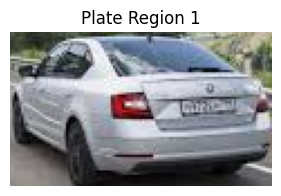


 Box 1 OCR results:

 Processing: cars+1.jpg

image 1/1 /home/jayden/alpr-demo/notebooks/../data/test/cars+1.jpg: 480x640 4 cars, 2 traffic lights, 1 stop sign, 62.8ms
Speed: 3.0ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


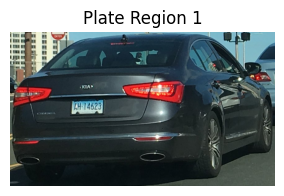


 Box 1 OCR results:
 'Kin ' (Confidence: 0.12)
 IH:1 4623 (Confidence: 0.15)


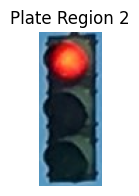


 Box 2 OCR results:


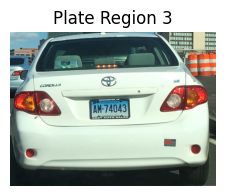


 Box 3 OCR results:
 CoROLLA (Confidence: 0.19)
 AnchISTUn: Ot (Confidence: 0.01)
 Connccticut (Confidence: 0.67)
 A74043 (Confidence: 0.99)
 ConslllulionSLe (Confidence: 0.28)
 Aoto (Confidence: 0.01)
 cL (Confidence: 0.10)


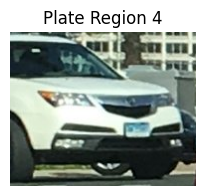


 Box 4 OCR results:


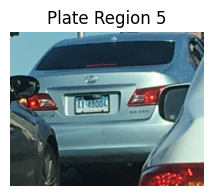


 Box 5 OCR results:
 nquody  (Confidence: 0.20)


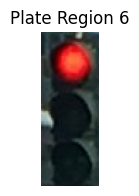


 Box 6 OCR results:


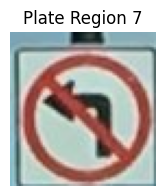


 Box 7 OCR results:

 Processing: car3.jpg

image 1/1 /home/jayden/alpr-demo/notebooks/../data/test/car3.jpg: 480x640 1 car, 62.5ms
Speed: 2.0ms preprocess, 62.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


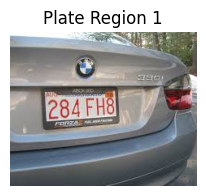


 Box 1 OCR results:
 J90 (Confidence: 0.35)
 284FH: (Confidence: 0.55)

 Processing: red car.jpg

image 1/1 /home/jayden/alpr-demo/notebooks/../data/test/red car.jpg: 384x640 11 cars, 1 truck, 52.6ms
Speed: 1.7ms preprocess, 52.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


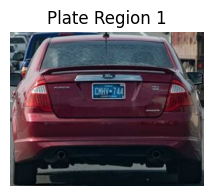


 Box 1 OCR results:
 CNHL:144 (Confidence: 0.07)


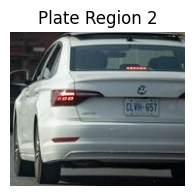


 Box 2 OCR results:
 @uS (Confidence: 0.02)


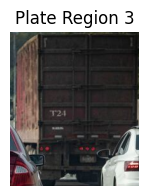


 Box 3 OCR results:
 T2i (Confidence: 0.21)


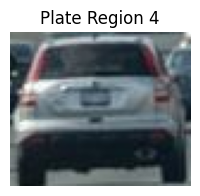


 Box 4 OCR results:


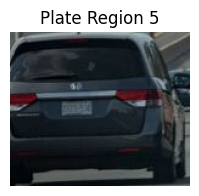


 Box 5 OCR results:


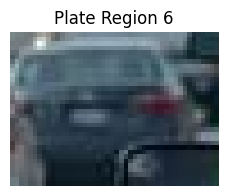


 Box 6 OCR results:


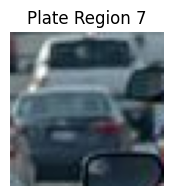


 Box 7 OCR results:


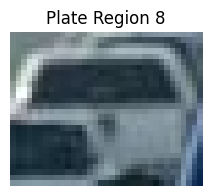


 Box 8 OCR results:


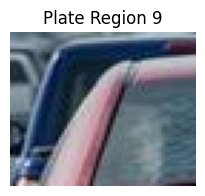


 Box 9 OCR results:


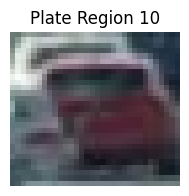


 Box 10 OCR results:


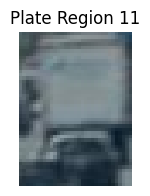


 Box 11 OCR results:


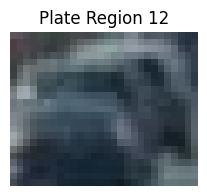


 Box 12 OCR results:

 Processing: car5.jpg

image 1/1 /home/jayden/alpr-demo/notebooks/../data/test/car5.jpg: 384x640 5 persons, 5 cars, 3 motorcycles, 55.7ms
Speed: 1.7ms preprocess, 55.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


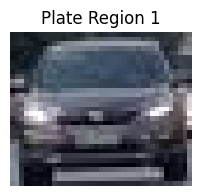


 Box 1 OCR results:


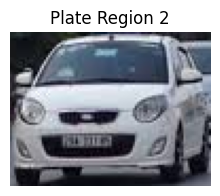


 Box 2 OCR results:


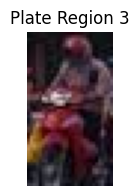


 Box 3 OCR results:


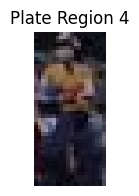


 Box 4 OCR results:


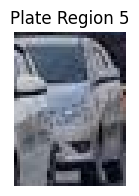


 Box 5 OCR results:


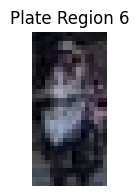


 Box 6 OCR results:


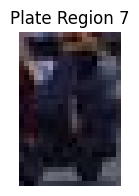


 Box 7 OCR results:


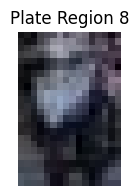


 Box 8 OCR results:


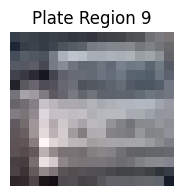


 Box 9 OCR results:


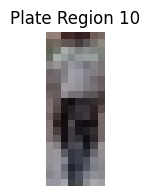


 Box 10 OCR results:


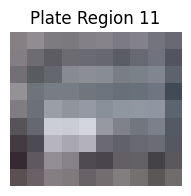


 Box 11 OCR results:


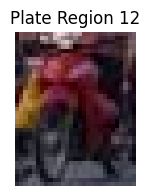


 Box 12 OCR results:


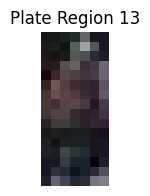


 Box 13 OCR results:

 Processing: download.jpg

image 1/1 /home/jayden/alpr-demo/notebooks/../data/test/download.jpg: 480x640 4 cars, 1 bus, 57.9ms
Speed: 1.9ms preprocess, 57.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


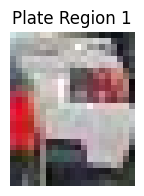


 Box 1 OCR results:


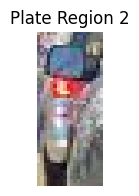


 Box 2 OCR results:


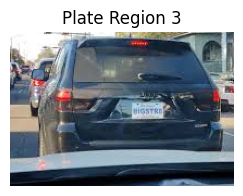


 Box 3 OCR results:


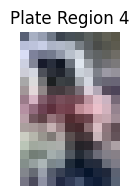


 Box 4 OCR results:


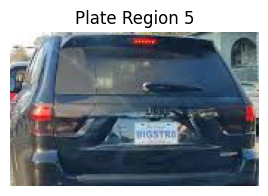


 Box 5 OCR results:


In [11]:
from ultralytics import YOLO
import easyocr
import cv2
import matplotlib.pyplot as plt
import os

model = YOLO('../models/yolov8n.pt')
ocr = easyocr.Reader(['en'])

image_dir = '../data/test'
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_path in image_paths:
    print (f"\n Processing: {os.path.basename(img_path)}")

    results = model(img_path)
    boxes = results[0].boxes.xyxy.cpu().numpy()

    img_bgr = cv2.imread(img_path)
    for i, box in enumerate(boxes):
        x1, y1, x2, y2, = map(int, box)
        cropped = img_bgr[y1:y2, x1:x2]
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(4,2))
        plt.imshow(cropped_rgb)
        plt.title(f"Plate Region {i+1}")
        plt.axis('off')
        plt.show()

        ocr_results = ocr.readtext(cropped_rgb)

        print(f"\n Box {i+1} OCR results:")
        for (_, text, confidence) in ocr_results:
            print(f" {text} (Confidence: {confidence:.2f})")

In [13]:
import time 
def benchmark_inference(model_path, image_path, device='cpu', runs=5):
    model = YOLO(model_path)
    model.to(device)
    img = cv2.imread(image_path)

    times = []
    for _ in range(runs):
        start = time.time()
        model.predict(img, device=device, verbose=False)
        times.append(time.time() - start)

    avg_time = sum(times)/ len(times)
    print(f"{device.upper()} average inference time over {runs} runs: {avg_time:.4f} seconds")

In [14]:
benchmark_inference('../models/yolov8n.pt', '../data/test/car3.jpg', device='cpu')

CPU average inference time over 5 runs: 0.1087 seconds
